## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

          0         1         2         3         4         5         6  \
0  1.000000 -0.260966 -0.028176  0.106555  0.122140  0.012748  0.025532   
1 -0.260966  1.000000 -0.560363  0.139578  0.114341  0.161742 -0.145033   
2 -0.028176 -0.560363  1.000000  0.357187 -0.575419 -0.278746 -0.097706   
3  0.106555  0.139578  0.357187  1.000000 -0.281683  0.172734  0.018510   
4  0.122140  0.114341 -0.575419 -0.281683  1.000000 -0.310531  0.152165   
5  0.012748  0.161742 -0.278746  0.172734 -0.310531  1.000000 -0.120656   
6  0.025532 -0.145033 -0.097706  0.018510  0.152165 -0.120656  1.000000   
7 -0.165298 -0.001967  0.066318  0.318814  0.069303  0.398087  0.108341   
8 -0.290379  0.098664  0.143850  0.091590 -0.018173 -0.664042 -0.007177   
9 -0.622528  0.035516  0.254380  0.322990 -0.264584  0.228877 -0.540338   

          7         8         9  
0 -0.165298 -0.290379 -0.622528  
1 -0.001967  0.098664  0.035516  
2  0.066318  0.143850  0.254380  
3  0.318814  0.091590  0.322990  
4  0

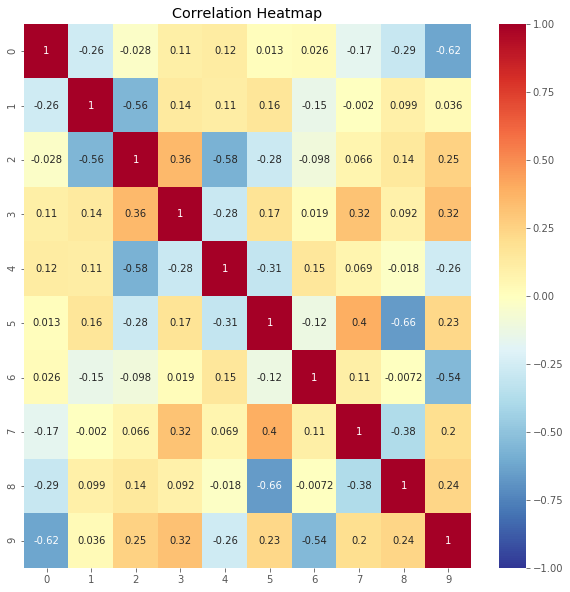

In [11]:
matrix = np.random.random((10,10))
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap');
ext_data_corrs = pd.DataFrame(matrix).corr()
print(ext_data_corrs)
heatmap = sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = +1)
plt.show()

[[0.81841509 0.15950285 0.92552374]
 [0.98149701 0.96597883 0.01626847]
 [0.55589716 0.49932942 0.61231103]
 ...
 [0.25227365 0.40283865 0.16606925]
 [0.93676655 0.01039037 0.02137193]
 [0.33108768 0.24728369 0.05216881]]


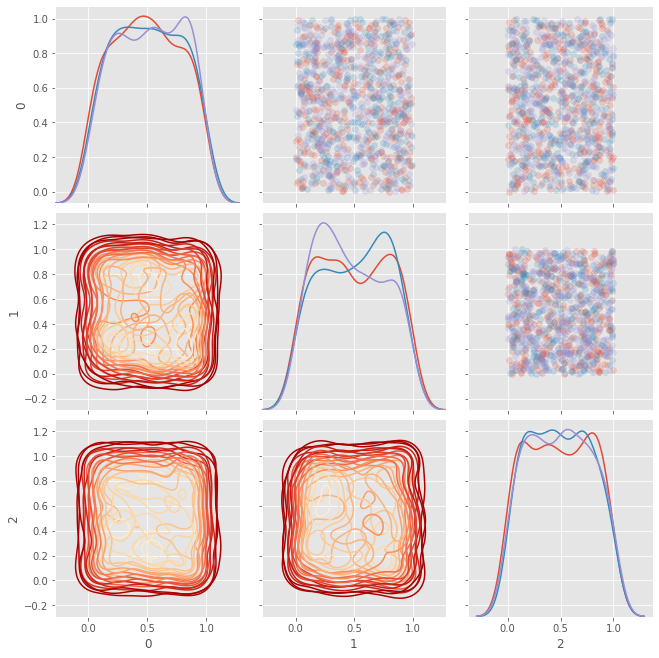

In [12]:
nrow = 1000
ncol = 3

matrix = np.random.random([nrow,ncol])
print(matrix)
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot )
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()

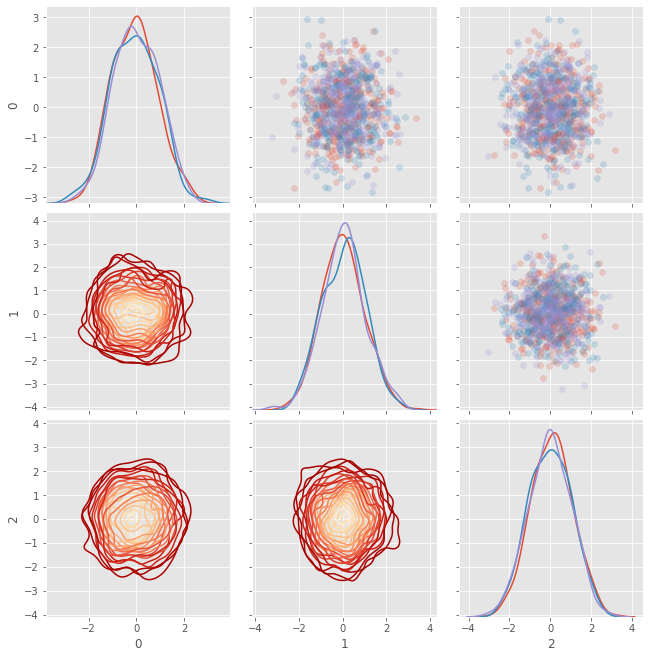

In [14]:
nrow = 1000
ncol = 3

matrix = np.random.randn(nrow,ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()